# EDA on Google Playstore data

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [69]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [71]:
df.shape

(10841, 13)

In [72]:
df.describe()

# Cause only rating is a numerical feature.

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# Steps we are going to follow


1. Data cleaning
2. Exploratory Data Analysis (EDA)

# 1. Data Cleaning:

In [73]:
# Check for missing values

df.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


Observation:

The dataset has missing values

In [74]:
df['Reviews'].value_counts()

,count
Reviews,
0,596
1,272
2,214
3,175
4,137
...,...
342912,1
4272,1
5517,1


In [75]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [76]:
df['Reviews'].astype('int')

ValueError: invalid literal for int() with base 10: '3.0M'

In [77]:
df['Reviews'].str.isnumeric().sum()

10840

In [78]:
df.shape

(10841, 13)

Here, this one missing data is the one record with '3.0M' review. This is causing pain ,so we will drop this record.

In [79]:
# To get this one record

df[-df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [80]:
# Make copy of dataset

df1 = df.copy()

In [81]:
df1.index[10472]

10472

In [82]:
df1.shape

(10841, 13)

In [83]:
# Removing the one record

df1 = df1.drop(10472)

In [84]:
df1.shape

(10840, 13)

In [85]:
df1[-df1['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [86]:
df1['Reviews'] = df1['Reviews'].astype(int)

In [87]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [88]:
# Let's see Size column now.

df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [89]:
df1['Size'].value_counts()

,count
Size,
Varies with device,1695
11M,198
12M,196
14M,194
13M,191
...,...
430k,1
429k,1
200k,1


In size column, 'M', 'k' and 'Varies with device' are present.

1 Mb = 1000 kb

19Mb - > 19000 kb.

NOTE: Here we are converting data in Size column in kb.

In [90]:
df1['Size'] = df1['Size'].str.replace('M', '000')
df1['Size'] = df1['Size'].str.replace('k', '')
df1['Size'] = df1['Size'].replace('Varies with device', np.nan)

In [91]:
df1['Size'].unique()

array(['19000', '14000', '8.7000', '25000', '2.8000', '5.6000', '29000',
       '33000', '3.1000', '28000', '12000', '20000', '21000', '37000',
       '2.7000', '5.5000', '17000', '39000', '31000', '4.2000', '7.0000',
       '23000', '6.0000', '6.1000', '4.6000', '9.2000', '5.2000', '11000',
       '24000', nan, '9.4000', '15000', '10000', '1.2000', '26000',
       '8.0000', '7.9000', '56000', '57000', '35000', '54000', '201',
       '3.6000', '5.7000', '8.6000', '2.4000', '27000', '2.5000', '16000',
       '3.4000', '8.9000', '3.9000', '2.9000', '38000', '32000', '5.4000',
       '18000', '1.1000', '2.2000', '4.5000', '9.8000', '52000', '9.0000',
       '6.7000', '30000', '2.6000', '7.1000', '3.7000', '22000', '7.4000',
       '6.4000', '3.2000', '8.2000', '9.9000', '4.9000', '9.5000',
       '5.0000', '5.9000', '13000', '73000', '6.8000', '3.5000', '4.0000',
       '2.3000', '7.2000', '2.1000', '42000', '7.3000', '9.1000', '55000',
       '23', '6.5000', '1.5000', '7.5000', '51000', 

In [92]:
# Converting string to float data type

df1['Size'] = df1['Size'].astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [93]:
# Let's see Installs column now.

df1['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [94]:
df1['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

Let's remove '+' and ',' from Installs column.

Let's remove '$'.

In [95]:
# Removing the above 3 characters in the dataset

chars_to_remove = ['+', ',', '$']
cols_to_clean = ['Installs', 'Price']

for col in cols_to_clean:
  for char in chars_to_remove:
    df1[col] = df1[col].str.replace(char, '')


In [96]:
df1['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [97]:
df1['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [98]:
df1['Installs'] = df1['Installs'].astype(int)
df1['Price'] = df1['Price'].astype(float)

In [99]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [100]:
# Let's clean data for "Last Updated" column.

df1['Last Updated'] = pd.to_datetime(df1['Last Updated'])
df1['Day'] = df1['Last Updated'].dt.day
df1['Month'] = df1['Last Updated'].dt.month
df1['Year'] = df1['Last Updated'].dt.year


In [101]:
df1.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


In [102]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Day             10840 non-null  int32         
 14  Month           10840 non-null  int32         
 15  Year   

In [103]:
df1['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [104]:
# We can apply One Hot Encoding for the above column.

# 2. EDA

In [105]:
df1.corr(numeric_only = True)

,Rating,Reviews,Size,Installs,Price,Day,Month,Year
Rating,1.000000,0.068141,0.082134,0.051355,-0.021903,-0.012508,0.017254,0.137714
Reviews,0.068141,1.000000,0.233791,0.643122,-0.009667,-0.030141,0.045930,0.075537
Size,0.082134,0.233791,1.000000,0.164608,-0.022772,-0.010380,0.038639,0.205476
Installs,0.051355,0.643122,0.164608,1.000000,-0.011689,-0.053122,0.056447,0.089368
Price,-0.021903,-0.009667,-0.022772,-0.011689,1.000000,-0.008225,0.006943,-0.007897
Day,-0.012508,-0.030141,-0.010380,-0.053122,-0.008225,1.000000,-0.079856,-0.016433
Month,0.017254,0.045930,0.038639,0.056447,0.006943,-0.079856,1.000000,-0.187306
Year,0.137714,0.075537,0.205476,0.089368,-0.007897,-0.016433,-0.187306,1.000000


In [106]:
df1.duplicated('App')

,0
0,False
1,False
2,False
3,False
4,False
...,...
10836,False
10837,False
10838,False
10839,False


In [107]:
df1[df1.duplicated('App')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4,100000,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0 and up,25,2,2016
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0,1000000,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0 and up,6,7,2018
10730,FP Notebook,MEDICAL,4.5,410,60000.0,50000,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up,24,3,2018
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12000.0,1000000,Free,0.0,Everyone,Shopping,2018-07-30,3.9,4.4 and up,30,7,2018


# Observation:

The dataset has 1181 duplicate records

In [108]:
df1[df1.duplicated('App')].shape

(1181, 16)

In [109]:
df1 = df1.drop_duplicates(subset=['App'], keep = 'first')

In [110]:
df1[df1.duplicated('App')].shape

(0, 16)

All the duplicates w.r.t the "App" column is removed.

In [111]:
# Let's explore more data (numer and cate)

numerical_features = [feature for feature in df1.columns if df1[feature].dtype != 'O']
categorical_featues = [feature for feature in df1.columns if df1[feature].dtype == 'O']

print("We have {} numerical featues : {}".format( len(numerical_features) , numerical_features ) )
print("\nWe have {} categorical features : {}".format( len(categorical_featues) , categorical_featues) )


We have 9 numerical featues : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year']

We have 7 categorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


# Visualization diagrams:

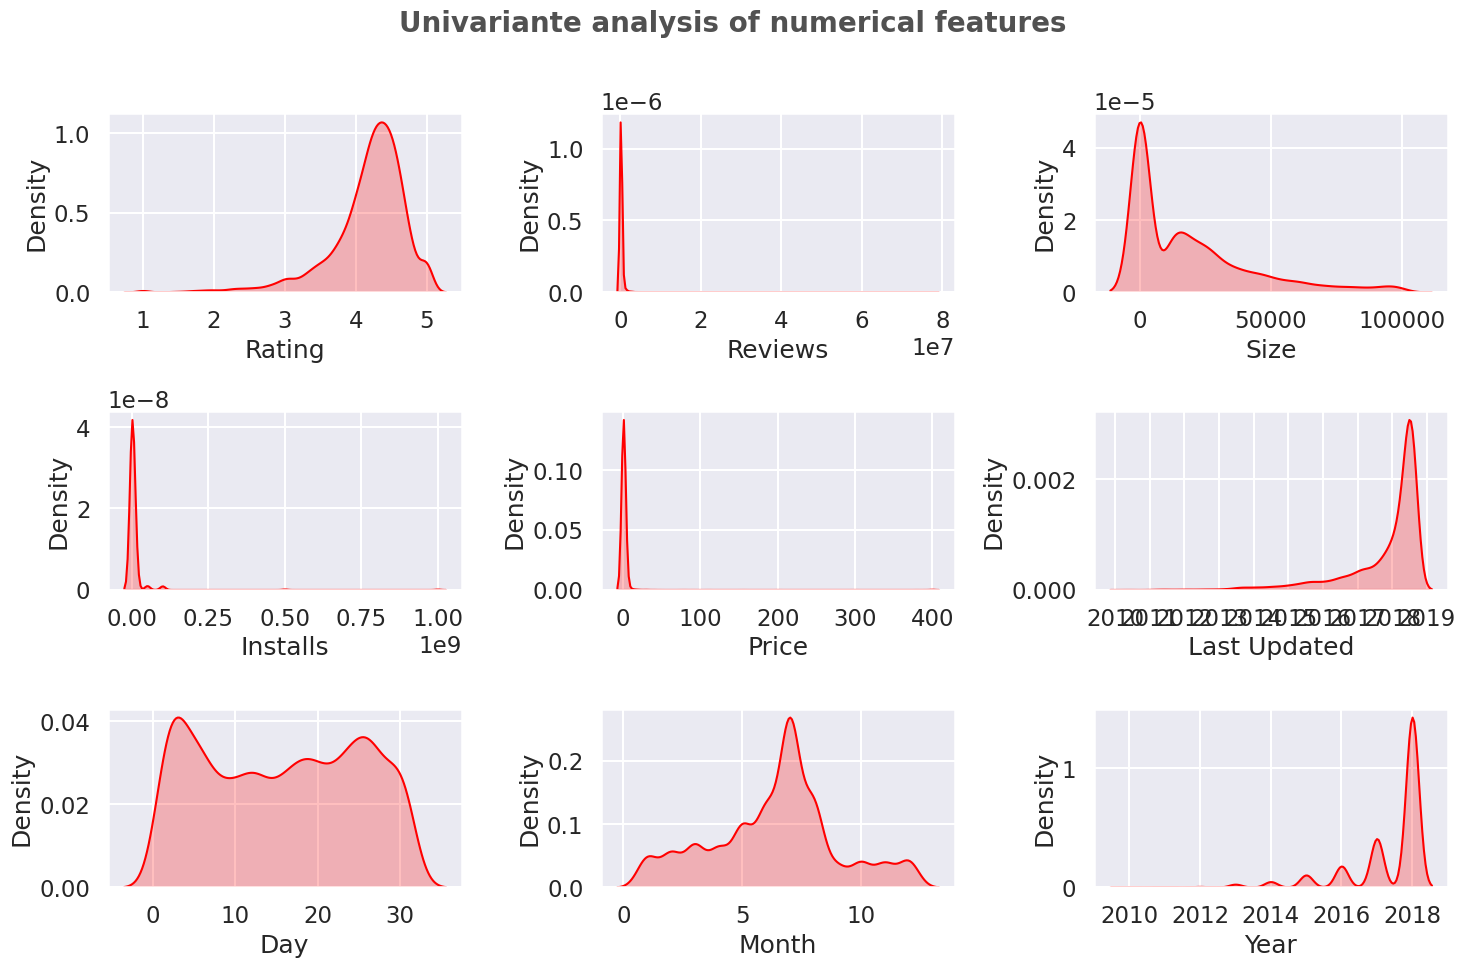

In [112]:
plt.figure(figsize = (15,15))
plt.suptitle('Univariante analysis of numerical features', fontsize = 20, fontweight = 'bold', alpha= 0.8, y = 1.0)

for i in range(0, len(numerical_features) ):
  plt.subplot(5, 3, i+1)
  sns.kdeplot(x= df1[numerical_features[i]], shade= True, color= 'r' )
  plt.xlabel(numerical_features[i])
  plt.tight_layout()

Observation:

1. Rating , Last Updated, Year are left skewed data.

2. Reviews, Size, Installs, Price are right skewed data.

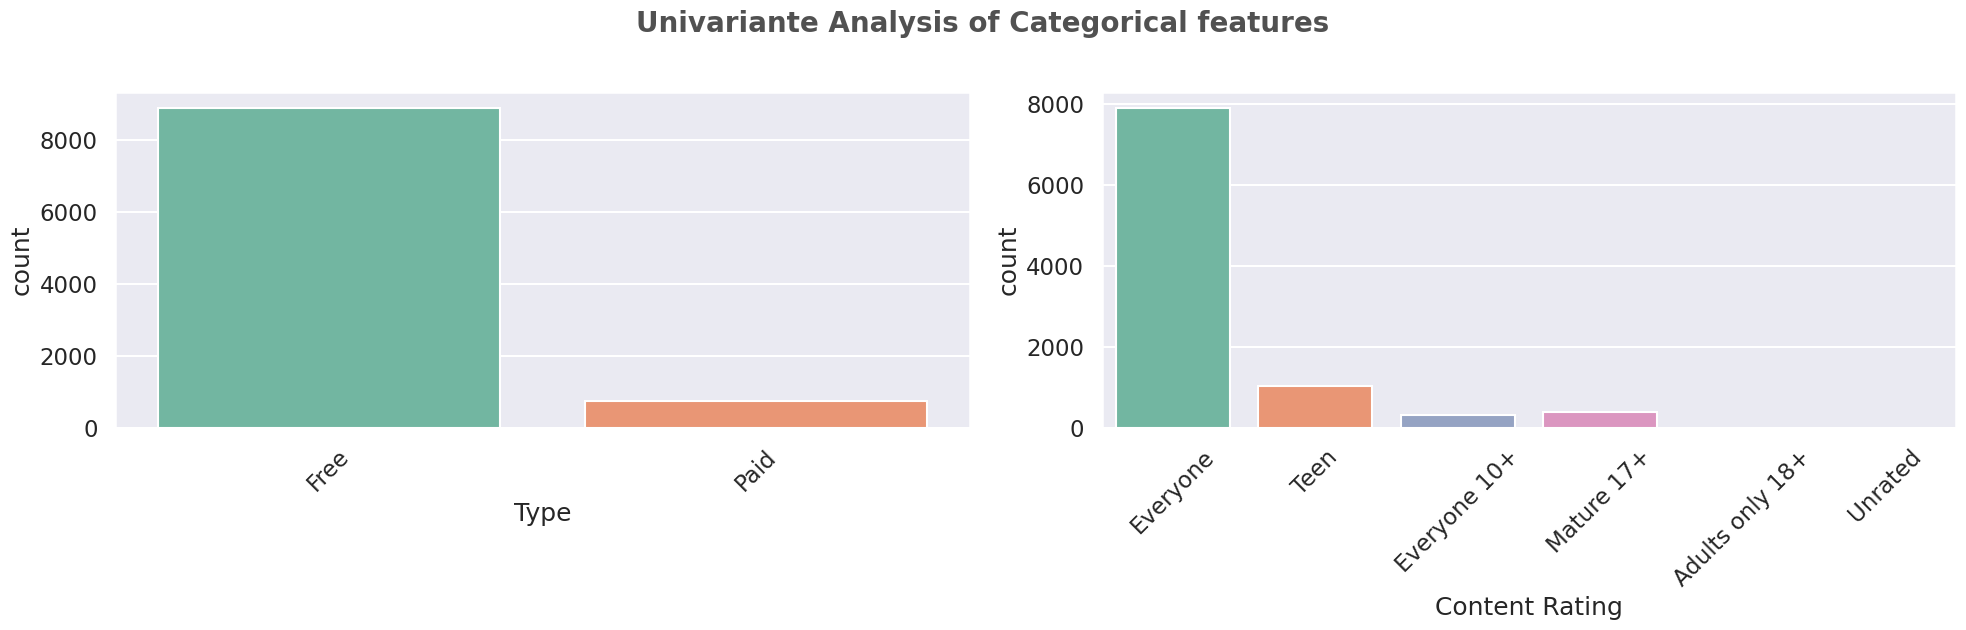

In [113]:
# Categorical columns:

plt.figure(figsize = (20,10))
plt.suptitle("Univariante Analysis of Categorical features", fontsize = 20, fontweight = 'bold', alpha = 0.8, y= 1.0)

category = ['Type', 'Content Rating']
for i in range(0, len(category)) :
  plt.subplot(2, 2, i+1)
  sns.countplot(x = df1[category[i]], palette= "Set2")
  plt.xlabel(category[i])
  plt.xticks(rotation = 45)
  plt.tight_layout()

In [114]:
df1['App'].value_counts()

,count
App,
Photo Editor & Candy Camera & Grid & ScrapBook,1
Tic Tac CK,1
INFAMY RO,1
CK Call NEW,1
Ck Coif,1
...,...
Bike Race Free - Top Motorcycle Racing Games,1
Dance School Stories - Dance Dreams Come True,1
3D Bowling,1


In [115]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


# Q. Which is the most popular app category.

In [116]:
df1['Category'].value_counts()

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


<Axes: ylabel='count'>

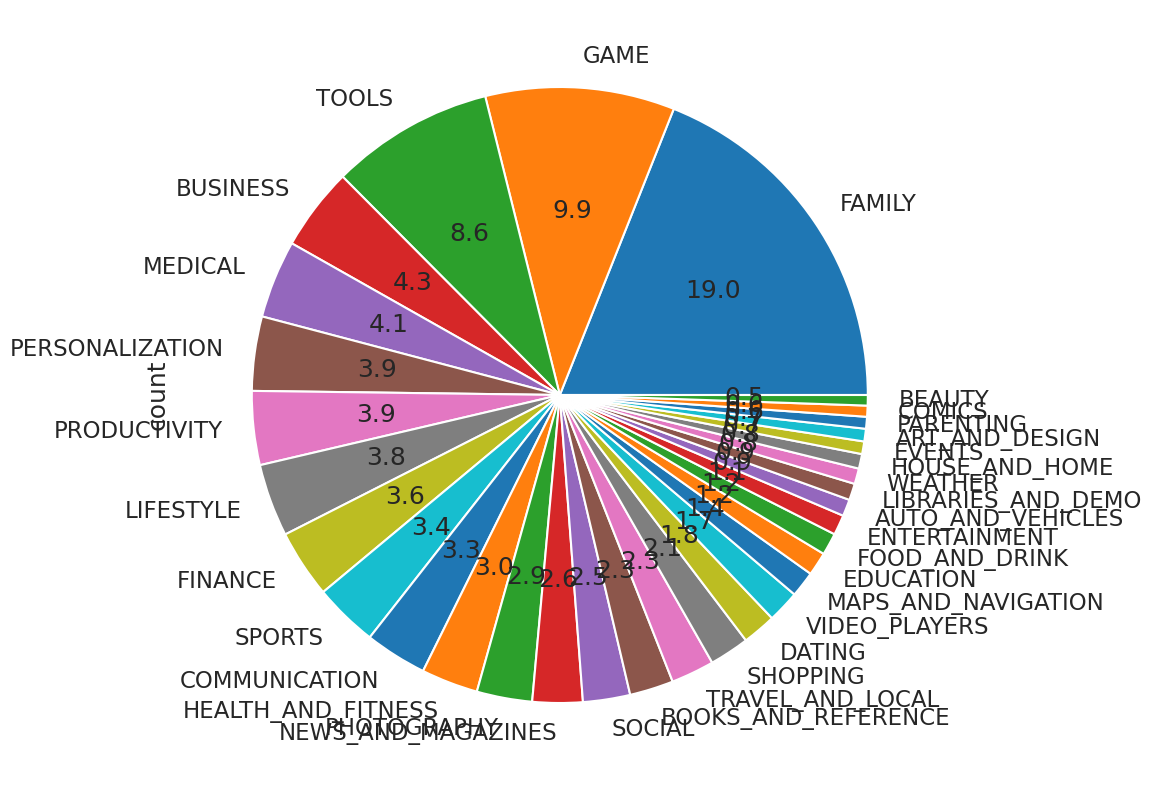

In [127]:
# To make a Pie chart for the different categories of App.

df1['Category'].value_counts().plot.pie(y = df1['Category'], figsize = (10,10), autopct = '%1.1f')

# Observation:

1. Apps under category of Family, Games and Tools are more in Playstore.

2. Apps under category Beauty, Arts and Weather etc. are less in Playstore.

# Q. Find the top 10 app categories.

In [118]:
category_df = pd.DataFrame(df1['Category'].value_counts())
category_df.rename(columns = {'Category': 'Count'}, inplace= True)

In [119]:
category_df

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


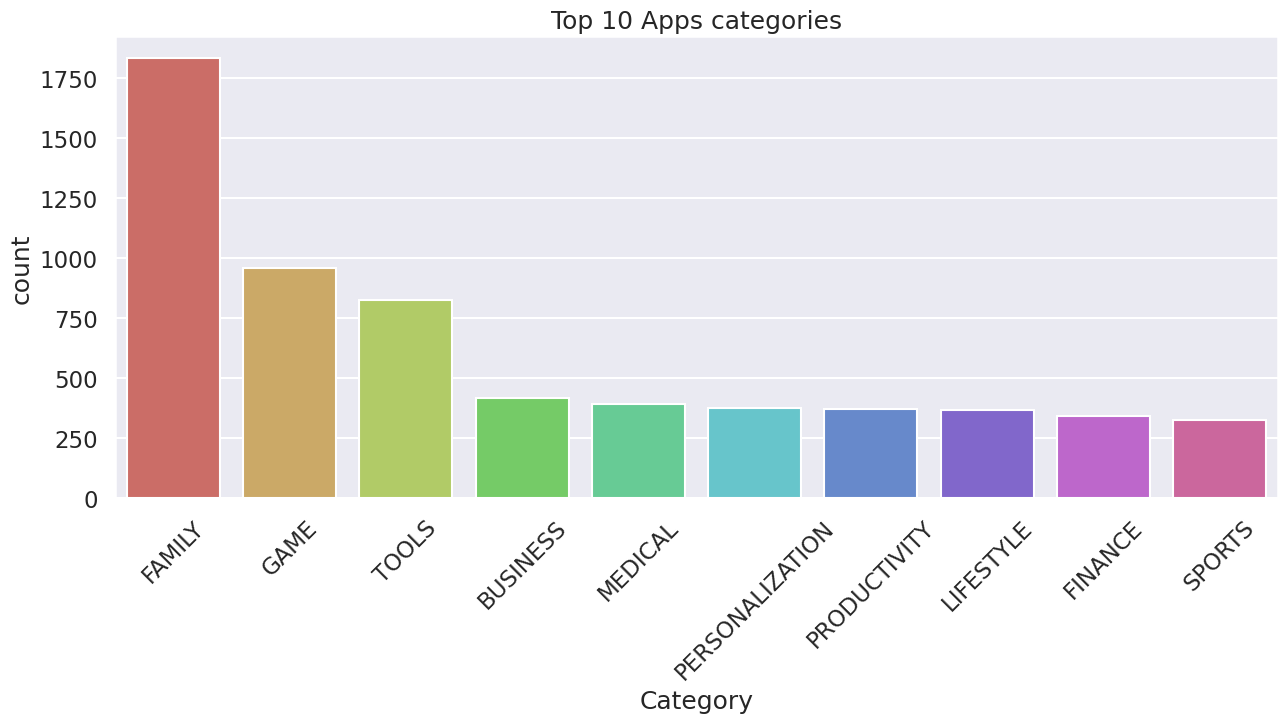

In [120]:
# Top 10 apps

plt.figure(figsize = (15, 6))
sns.barplot(x = category_df.index[:10], y ='count', data = category_df[:10], palette = 'hls')
plt.title('Top 10 Apps categories')
plt.xticks(rotation = 45)
plt.show()

Internal Assignments:

1. Which category has largest number of installations?

2. What are the top 5 most installed apps in each popular categories?

3. How many apps are there on Google Playstore which gets rating 5?

# 1. Category which has highest number of installs

In [121]:
df_cat_ins = df1.groupby(['Category'])['Installs'].sum()
df_cat_ins

,Installs
Category,
ART_AND_DESIGN,114338100
AUTO_AND_VEHICLES,53130211
BEAUTY,27197050
BOOKS_AND_REFERENCE,1665969576
BUSINESS,697164865
COMICS,44981150
COMMUNICATION,11038276251
DATING,140926107
EDUCATION,352952000


In [122]:
df_cat_ins = df1.groupby(['Category'])['Installs'].sum().sort_values()
df_cat_ins

,Installs
Category,
EVENTS,15973161
BEAUTY,27197050
PARENTING,31521110
MEDICAL,38193177
COMICS,44981150
LIBRARIES_AND_DEMO,52995910
AUTO_AND_VEHICLES,53130211
HOUSE_AND_HOME,97212461
ART_AND_DESIGN,114338100


In [123]:
df_cat_ins = df1.groupby(['Category'])['Installs'].sum().sort_values(ascending= False).reset_index()

In [124]:
# Converting into billions

df_cat_ins['Installs'] = df_cat_ins['Installs'] / 1000000000
df_cat_ins

,Category,Installs
0,GAME,13.878924
1,COMMUNICATION,11.038276
2,TOOLS,8.001772
3,PRODUCTIVITY,5.793091
4,SOCIAL,5.487868
5,PHOTOGRAPHY,4.649148
6,FAMILY,4.427942
7,VIDEO_PLAYERS,3.926903
8,TRAVEL_AND_LOCAL,2.894887
9,NEWS_AND_MAGAZINES,2.369218


Text(0.5, 1.0, 'Most popular categories in play store')

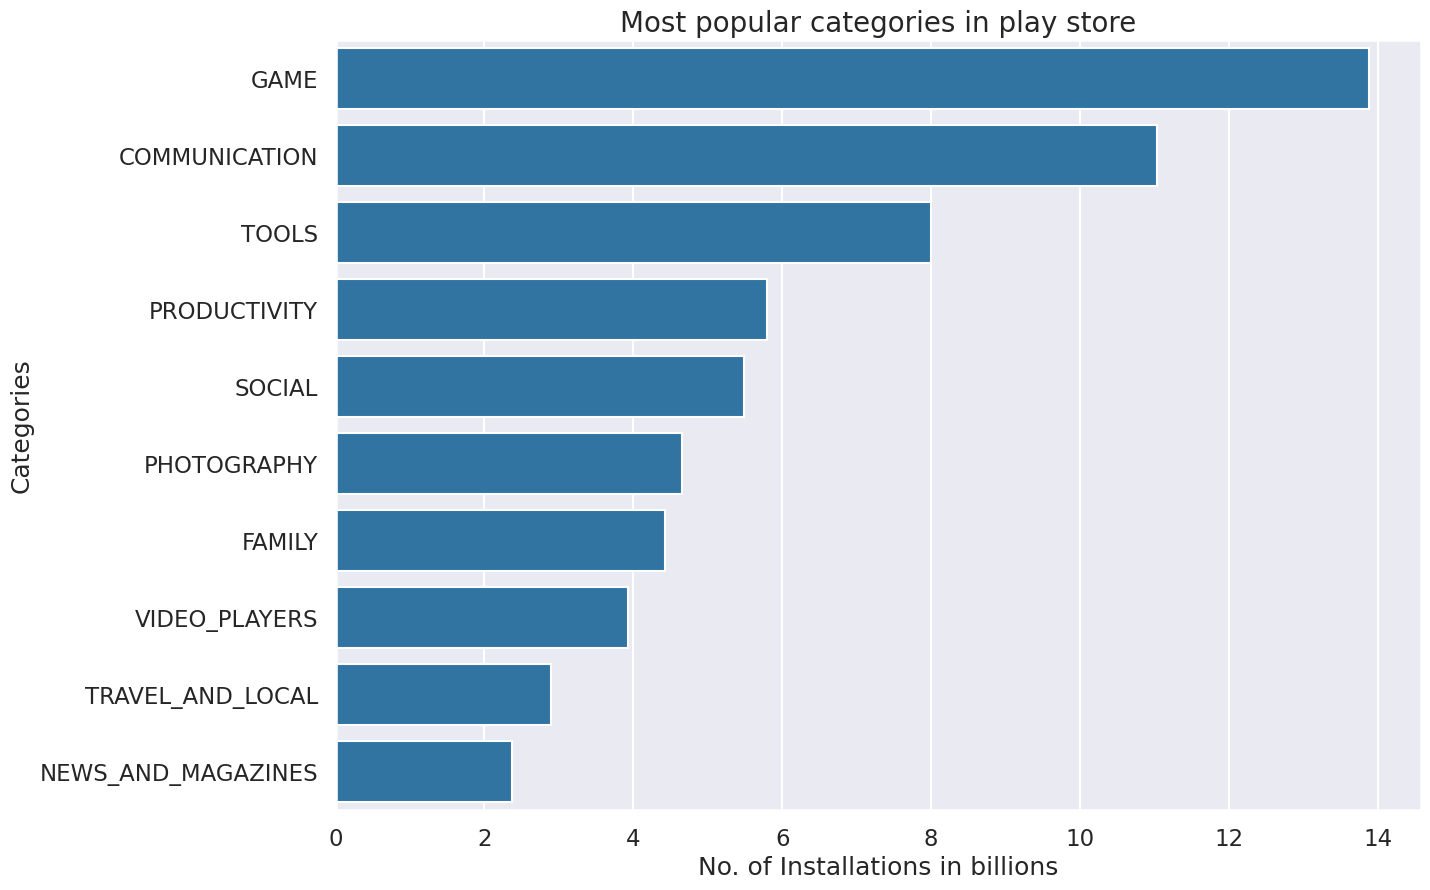

In [125]:
# Plotting the barplot.

plt.figure(figsize = (14,10))
sns.set_context("talk")
sns.set_style("darkgrid")
ax = sns.barplot(x= 'Installs', y= 'Category', data = df_cat_ins.head(10))
ax.set_xlabel('No. of Installations in billions')
ax.set_ylabel('Categories')
ax.set_title('Most popular categories in play store', size = 20)

# 2. Top 5 most installed apps in each popular categories

In [126]:

df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [130]:
df1.shape

(9659, 16)

In [129]:
df1['App'].value_counts()

,count
App,
Photo Editor & Candy Camera & Grid & ScrapBook,1
Tic Tac CK,1
INFAMY RO,1
CK Call NEW,1
Ck Coif,1
...,...
Bike Race Free - Top Motorcycle Racing Games,1
Dance School Stories - Dance Dreams Come True,1
3D Bowling,1


In [157]:
df_sort_ins = df1.sort_values(by = 'Installs', ascending = False).reset_index()
df_sort_ins

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.00,Everyone,Communication,2018-08-03,Varies with device,Varies with device,3,8,2018
1,152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,NaN,1000000000,Free,0.00,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device,3,8,2018
2,1654,Subway Surfers,GAME,4.5,27722264,76000.0,1000000000,Free,0.00,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up,12,7,2018
3,3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,NaN,1000000000,Free,0.00,Everyone,Travel & Local,2018-07-31,Varies with device,Varies with device,31,7,2018
4,340,Gmail,COMMUNICATION,4.3,4604324,NaN,1000000000,Free,0.00,Everyone,Communication,2018-08-02,Varies with device,Varies with device,2,8,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,9917,Eu Sou Rico,FINANCE,NaN,0,1.4,0,Paid,394.99,Everyone,Finance,2018-07-11,1.0,4.0.3 and up,11,7,2018
9655,6692,cronometra-br,PRODUCTIVITY,NaN,0,5.4,0,Paid,154.99,Everyone,Productivity,2017-11-24,1.0.0,4.1 and up,24,11,2017
9656,5486,AP Series Solution Pro,FAMILY,NaN,0,7.4,0,Paid,1.99,Everyone,Education,2017-07-30,1.3,4.0 and up,30,7,2017
9657,9719,EP Cook Book,MEDICAL,NaN,0,3.2,0,Paid,200.00,Everyone,Medical,2015-07-26,1.0,3.0 and up,26,7,2015


In [155]:
top_categories = df_cat_ins.head(10)['Category'].to_list()   # calculated in previous question
top_categories

['GAME',
 'COMMUNICATION',
 'TOOLS',
 'PRODUCTIVITY',
 'SOCIAL',
 'PHOTOGRAPHY',
 'FAMILY',
 'VIDEO_PLAYERS',
 'TRAVEL_AND_LOCAL',
 'NEWS_AND_MAGAZINES']

In [158]:
df_sort_ins['App']

,App
0,WhatsApp Messenger
1,Google Play Books
2,Subway Surfers
3,Maps - Navigate & Explore
4,Gmail
...,...
9654,Eu Sou Rico
9655,cronometra-br
9656,AP Series Solution Pro
9657,EP Cook Book


In [175]:
df_sort_ins

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.00,Everyone,Communication,2018-08-03,Varies with device,Varies with device,3,8,2018
1,152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,NaN,1000000000,Free,0.00,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device,3,8,2018
2,1654,Subway Surfers,GAME,4.5,27722264,76000.0,1000000000,Free,0.00,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up,12,7,2018
3,3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,NaN,1000000000,Free,0.00,Everyone,Travel & Local,2018-07-31,Varies with device,Varies with device,31,7,2018
4,340,Gmail,COMMUNICATION,4.3,4604324,NaN,1000000000,Free,0.00,Everyone,Communication,2018-08-02,Varies with device,Varies with device,2,8,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,9917,Eu Sou Rico,FINANCE,NaN,0,1.4,0,Paid,394.99,Everyone,Finance,2018-07-11,1.0,4.0.3 and up,11,7,2018
9655,6692,cronometra-br,PRODUCTIVITY,NaN,0,5.4,0,Paid,154.99,Everyone,Productivity,2017-11-24,1.0.0,4.1 and up,24,11,2017
9656,5486,AP Series Solution Pro,FAMILY,NaN,0,7.4,0,Paid,1.99,Everyone,Education,2017-07-30,1.3,4.0 and up,30,7,2017
9657,9719,EP Cook Book,MEDICAL,NaN,0,3.2,0,Paid,200.00,Everyone,Medical,2015-07-26,1.0,3.0 and up,26,7,2015


In [184]:
df_sort_ins['App'][0]

'WhatsApp Messenger'

In [177]:
count = 0
 # if df_sort_ins['Category'] in top_categories:

for app in df_sort_ins['App']:
   count = count + 1
   print(app)

   if count == 10:
     break

WhatsApp Messenger
Google Play Books
Subway Surfers
Maps - Navigate & Explore
Gmail
Instagram
Facebook
Google Chrome: Fast & Secure
Google+
YouTube


# Listing top 5 apps, in each top 10 categories

Step1: Group by category and find total installs.

Step2: Filter the dataframe for top 10 categories.

Step3: Get top 5 apps in each category.

In [188]:
# Step1:

# Step 1: Group by category and calculate total installs
top_categories = (
    df1.groupby('Category')['Installs']
    .sum()
    .sort_values(ascending=False)
    .head(10)  # Top 10 categories
    .index
)

top_categories

Index(['GAME', 'COMMUNICATION', 'TOOLS', 'PRODUCTIVITY', 'SOCIAL',
       'PHOTOGRAPHY', 'FAMILY', 'VIDEO_PLAYERS', 'TRAVEL_AND_LOCAL',
       'NEWS_AND_MAGAZINES'],
      dtype='object', name='Category')

In [191]:
# Step 2: Filter the DataFrame for top 10 categories
filtered_df = df1[df1['Category'].isin(top_categories)]

filtered_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,1,8,2018
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,3,8,2018
337,Messenger for SMS,COMMUNICATION,4.3,125257,17000.0,10000000,Free,0.0,Teen,Communication,2018-06-06,1.8.9,4.1 and up,6,6,2018
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,1,8,2018
339,Messenger Lite: Free Calls & Messages,COMMUNICATION,4.4,1429035,NaN,100000000,Free,0.0,Everyone,Communication,2018-07-25,37.0.0.7.163,2.3 and up,25,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13000.0,5000,Free,0.0,Everyone,Education,2018-06-13,2.0.20,4.0.3 and up,13,6,2018
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2.3,100000,Free,0.0,Everyone,News & Magazines,2014-01-20,1.5,1.6 and up,20,1,2014
10834,FR Calculator,FAMILY,4.0,7,2.6,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up,18,6,2017
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,25,7,2017


In [193]:
# Step 3: Get top 5 apps in each category
top_apps_per_category = (
    filtered_df
    .sort_values(by=['Category', 'Installs'], ascending=[True, False])  # Sort within each category
    .groupby('Category')
    .head(5)  # Select top 5 apps per category
)

top_apps_per_category

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,1,8,2018
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,3,8,2018
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,1,8,2018
340,Gmail,COMMUNICATION,4.3,4604324,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device,2,8,2018
341,Hangouts,COMMUNICATION,4.0,3419249,NaN,1000000000,Free,0.0,Everyone,Communication,2018-07-21,Varies with device,Varies with device,21,7,2018
3975,Hay Day,FAMILY,4.5,10053186,94000.0,100000000,Free,0.0,Everyone,Casual,2018-06-28,1_39_93,4.0.3 and up,28,6,2018
4111,Talking Tom Cat 2,FAMILY,4.3,3213548,55000.0,100000000,Free,0.0,Everyone 10+,Entertainment,2018-07-25,5.3.5.16,4.1 and up,25,7,2018
4217,Talking Ginger,FAMILY,4.2,1752017,52000.0,100000000,Free,0.0,Everyone,Entertainment,2018-07-05,2.5.6.11,4.1 and up,5,7,2018
4229,Where's My Water? Free,FAMILY,4.4,1372013,57000.0,100000000,Free,0.0,Everyone,Puzzle;Brain Games,2017-11-21,1.10.0,4.1 and up,21,11,2017
4247,Talking Tom Cat,FAMILY,4.3,1838090,NaN,100000000,Free,0.0,Everyone 10+,Casual,2018-07-27,Varies with device,4.1 and up,27,7,2018


In [194]:
top_apps_per_category.shape

(50, 16)

# 3. How many apps are there on Google Playstore which gets rating 5?

In [195]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [197]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            8432 non-null   float64       
 5   Installs        9659 non-null   int64         
 6   Type            9658 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
 13  Day             9659 non-null   int32         
 14  Month           9659 non-null   int32         
 15  Year    

In [198]:
df_rating = df1[df1['Rating'] == 5.0]
df_rating

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37000.0,1000,Free,0.0,Everyone,Comics,2018-06-26,2.0,4.0.3 and up,26,6,2018
612,American Girls Mobile Numbers,DATING,5.0,5,4.4,1000,Free,0.0,Mature 17+,Dating,2018-07-17,3.0,4.0.3 and up,17,7,2018
615,Awake Dating,DATING,5.0,2,70000.0,100,Free,0.0,Mature 17+,Dating,2018-07-24,2.2.9,4.4 and up,24,7,2018
633,Spine- The dating app,DATING,5.0,5,9.3,500,Free,0.0,Teen,Dating,2018-07-14,4.0,4.0.3 and up,14,7,2018
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0,100,Free,0.0,Mature 17+,Dating,2018-08-01,8.2,4.0.3 and up,1,8,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10721,Mad Dash Fo' Cash,GAME,5.0,14,16000.0,100,Free,0.0,Everyone,Arcade,2017-06-19,2.5a,4.1 and up,19,6,2017
10742,GKPB FP Online Church,LIFESTYLE,5.0,32,7.9,1000,Free,0.0,Everyone,Lifestyle,2017-12-31,0.7.1,4.4 and up,31,12,2017
10776,Monster Ride Pro,GAME,5.0,1,24000.0,10,Free,0.0,Everyone,Racing,2018-03-05,2.0,2.3 and up,5,3,2018
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8.6,1000,Free,0.0,Teen,Education,2018-06-27,3.8.0,4.1 and up,27,6,2018


A3.) 271 Apps are present in Google Playstore having rating 5.